In [ ]:
# basic model
import sys
import random
import numpy as np

np.random.seed(10)

sys.path.append("../")
import pandas as pd
import os
import matplotlib as plt
import src.preprocessing as pp

#import seaborn as sns
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import plotly.express as px
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    r2_score,
    f1_score
)
from itertools import permutations
from typing import List, Tuple

# feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.utils import resample

In [ ]:
identifiers = ["date_id_a", "match_a", #"wave_a", 
"date_id_b"] #"iid_b", "match_b", , "iid_a", "wave_b"

# same as 1_1
#preference = ["pf_o_att_a", "pf_o_sin_a", "pf_o_int_a", "pf_o_fun_a", "pf_o_amb_a", "pf_o_sha_a", 
#"pf_o_att_b", "pf_o_sin_b", "pf_o_int_b", "pf_o_fun_b", "pf_o_amb_b", "pf_o_sha_b"]

personal_info = ["field_cd_a", "age_a", "race_a", "income_a", "zipcode_area_a", "samerace_a", "goal_a",
"field_cd_b", "age_b", "race_b", "income_b", "zipcode_area_b", "goal_b", "distance_bin", "gender_a", "gender_b"] # "samerace_b",

behaviour = ["go_out_a", "sports_a", "tvsports_a", "exercise_a", "dining_a", "museums_a", "art_a", "hiking_a", "gaming_a",
           "clubbing_a", "reading_a", "tv_a", "theater_a", "movies_a", "concerts_a", "music_a", "shopping_a",
           "yoga_a", "exphappy_a",
           "go_out_b", "sports_b", "tvsports_b", "exercise_b", "dining_b", "museums_b", "art_b", "hiking_b", "gaming_b",
           "clubbing_b", "reading_b", "tv_b", "theater_b", "movies_b", "concerts_b", "music_b", "shopping_b",
           "yoga_b", "exphappy_b"]

difference_hobbies = ["go_out_df", "sports_df", "tvsports_df", "exercise_df", "dining_df", "museums_df", "art_df", "hiking_df", "gaming_df",
           "clubbing_df", "reading_df", "tv_df", "theater_df", "movies_df", "concerts_df", "music_df", "shopping_df", "yoga_df", "exphappy_df"]

looking_for = ["attr1_1_a", "sinc1_1_a", "intel1_1_a", "fun1_1_a", "amb1_1_a", "imprace_a", "imprelig_a",
"attr1_1_b", "sinc1_1_b", "intel1_1_b", "fun1_1_b", "amb1_1_b", "imprace_b", "imprelig_b"]

self_rating = [ "attr3_1_a", "sinc3_1_a", "intel3_1_a", "fun3_1_a", "amb3_1_a", "attr3_1_b", "sinc3_1_b", "intel3_1_b", "fun3_1_b", "amb3_1_b"]

# difference between what person a i slooking for b what person a rates themselves 1_1_a and 3_1_b
difference = ["attr_b_a", "sinc_b_a", "intel_b_a", "fun_b_a", "amb_b_a", "attr_a_b", "sinc_a_b", "intel_a_b", "fun_a_b", "amb_a_b"]

variations = ["var_undergrad", "var_budget", "var_diff_mc", "var_mag", "var_book"]

to_drop = ["date_id_a", "date_id_b", "wave_a", "wave_b", 'Unnamed: 0', "latitude_a", "latitude_b", "longitude_a", "longitude_b", "distance", "from_a", "from_b", "zipcode_a", "zipcode_b"] #TODO clean text in from column

to_keep = personal_info + identifiers  + behaviour + self_rating + looking_for#+ difference_hobbies + difference

categorical = ["income_a", "income_b", "distance_bin", "zipcode_area_b", "zipcode_area_a"]

In [ ]:
# read in data
df = pd.read_csv("../data/interim/single_row_date.csv")
df = df[to_keep]

#df.drop(to_drop, axis = 1, inplace = True)
df.drop(["date_id_a", "date_id_b"], axis = 1, inplace = True)


In [ ]:
x = df.match_a.value_counts()
x[0]/(x[0]+x[1])

0.834248455730954

In [ ]:
df["zipcode_area_b"] = df["zipcode_area_b"].replace("Not", 0)
df["zipcode_area_a"] = df["zipcode_area_a"].replace("Not", 0)

In [ ]:
df = pd.get_dummies(df, columns = categorical)

In [ ]:
# find columns with missing vlaues and remove rows with missing vlaues
df.columns[df.isnull().any()].tolist()
df.isnull().sum().sort_values(ascending=False).head(10)
df.dropna(inplace=True)

In [ ]:
X = df[[column for column in df.columns if column!="match_a"]]
y = df["match_a"]
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.30, stratify=y, shuffle=True
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2000, 313) (2000,)
(858, 313) (858,)


In [ ]:
k = X_train.shape[1]

# select k most important features
# To start with we'll look at them all
X_train_fs, X_test_fs, all_vars, ns_df_sorted = pp.select_features(X_train, y_train, X_test, k=100, df=X)

In [ ]:
ns_df_sorted.head(15)

,Feat_names,F_Scores
28,zipcode_area_b_246,20.024024
70,zipcode_area_a_483,17.631713
80,zipcode_area_a_767,16.133596
34,zipcode_area_b_483,16.108355
8,income_a_89998.0 and 99998.0,15.024025
61,zipcode_area_a_189,11.582873
64,zipcode_area_a_220,9.824669
71,zipcode_area_a_488,8.467179
51,zipcode_area_b_928,8.270562
41,zipcode_area_b_770,8.154189


accuracy: 0.8368298368298368
f1_score: 0.26315789473684215


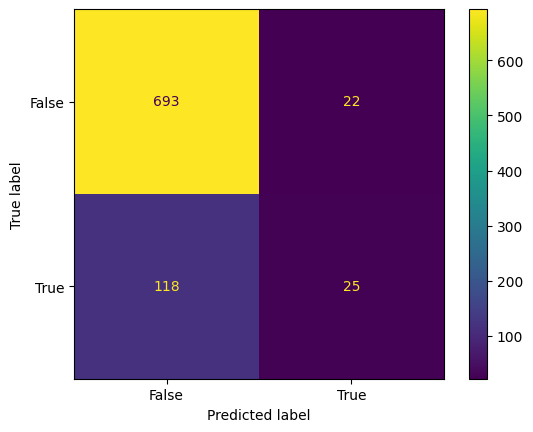

In [ ]:
# logistic regression without feature selection
log_reg = pp.log_reg(X_train, y_train, X_test, y_test, X.columns)
print("accuracy:", log_reg["accuracy"])
print("f1_score:", log_reg["F1_score"])

accuracy: 0.8508158508158508
f1_score: 0.21951219512195125


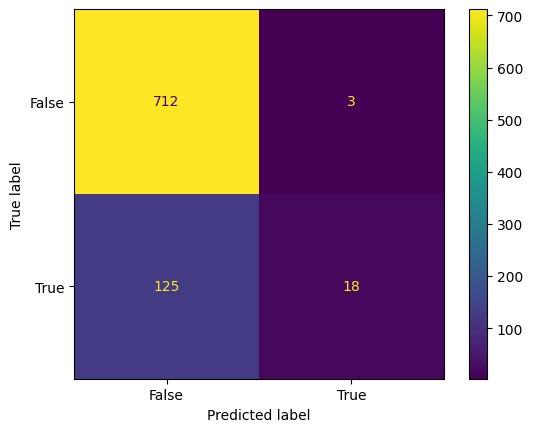

In [ ]:
# logistic regression with feature selection
log_reg = pp.log_reg(X_train_fs, y_train, X_test_fs, y_test, X.columns)
print("accuracy:", log_reg["accuracy"])
print("f1_score:", log_reg["F1_score"])

In [ ]:
train_df = X_train.copy()
train_df["match_a"] = y_train

In [ ]:
# looking for best performing upsample multiplier
# for m in [1.2, 1.5, 1.7, 2, 2.2, 2.5, 2.7, 3, 3.2, 3.5, 3.7, 4]:
#     print("Upsample multiplier: ", m)
#     pp.resample_data(train_df, m, X_test, y_test, LogisticRegression(random_state=42, max_iter= 10000))

X_train shape is:  (2733, 313) X_train shape is:  (2733,)
Precision: 0.3068181818181818
Recall: 0.3776223776223776
Accuracy: 0.754079254079254
F1 Score: 0.33855799373040757


LogisticRegression(max_iter=10000, random_state=42)

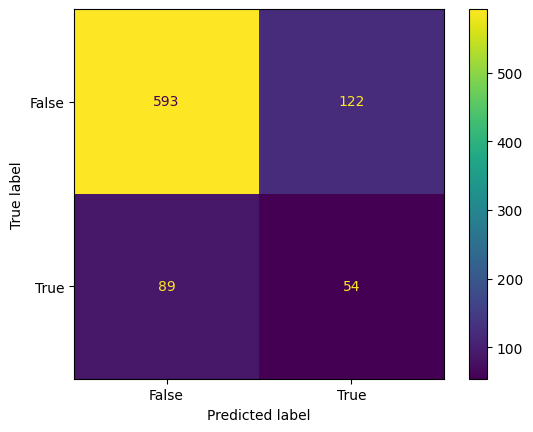

In [ ]:
pp.resample_data(train_df, 3.2, X_test, y_test, LogisticRegression(random_state=42, max_iter= 10000))